In [2]:
import os
import wget
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as od

In [3]:
file = 'data.csv'
if os.path.isfile(file):
    print('file exists')
else:
    wget.download('https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv', file)

In [14]:
df = pd.read_csv(file)

In [18]:
df.columns = df.columns.str.lower()

In [19]:
df.head()

,name,age,income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


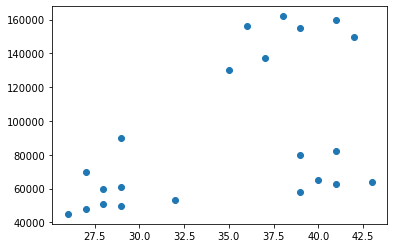

In [20]:
plt.scatter(df['age'], df['income($)'])

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [25]:
k_means = KMeans(n_clusters=3)

In [27]:
y_pred = k_means.fit_predict(df[['age','income($)']])

In [28]:
df['km_predict'] = y_pred

In [29]:
df.head()

,name,age,income($),km_predict
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


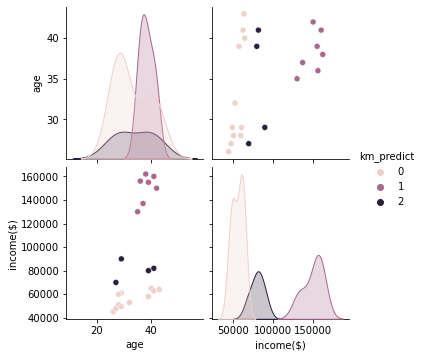

In [31]:
import seaborn as sns
sns.pairplot(df, hue='km_predict')

In [34]:
m_scalar = MinMaxScaler()
m_scalar.fit(df[['income($)']])
df['income($)'] = m_scalar.transform(df[['income($)']])

In [36]:
m_scalar = MinMaxScaler()
m_scalar.fit(df[['age']])
df['age'] = m_scalar.transform(df[['age']])

In [37]:
df.head()

,name,age,income($),km_predict
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [40]:
k_means = KMeans(n_clusters=3)
y_pred = k_means.fit_predict(df[['age','income($)']])

In [41]:
df['predict_scaled'] = y_pred

In [42]:
df.head()

,name,age,income($),km_predict,predict_scaled
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0


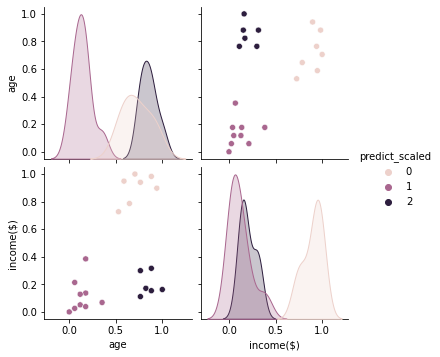

In [44]:
sns.pairplot(df.drop(columns=['km_predict']), hue='predict_scaled')

In [45]:
k_means.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [46]:
k_means.inertia_

0.4750783498553097

In [47]:
from sklearn.datasets import load_iris
iris= load_iris()

In [48]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [51]:
df['target'] = iris.target

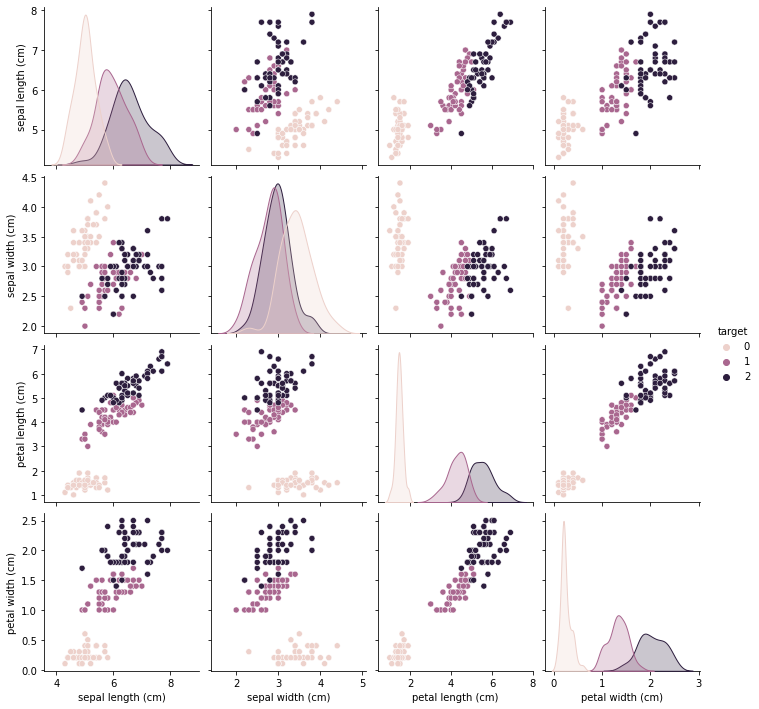

In [52]:
sns.pairplot(df, hue='target')

In [53]:
df.drop(columns=['target'], inplace=True)

In [54]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
k_means = KMeans(n_clusters=3)
y_pred = k_means.fit_predict(df)

In [57]:
df['target_pred'] = y_pred

In [58]:
df['real_target'] = iris.target

In [59]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_pred,real_target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


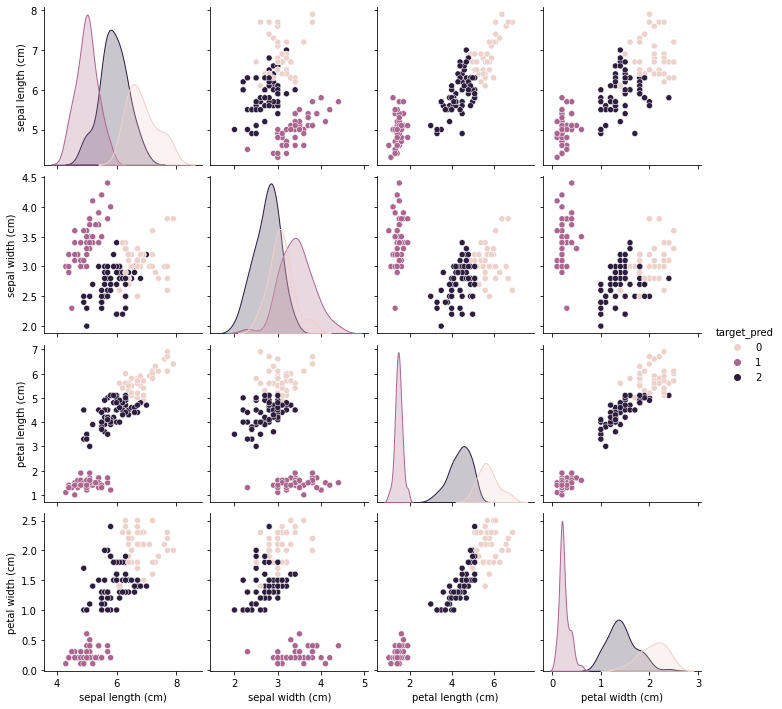

In [60]:
sns.pairplot(df.drop(columns='real_target'), hue='target_pred')

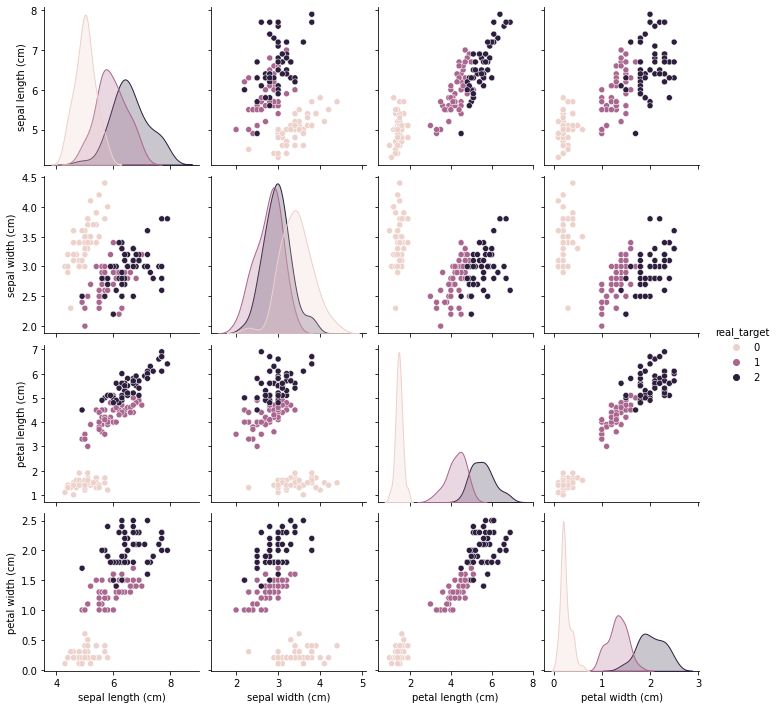

In [61]:
sns.pairplot(df.drop(columns='target_pred'), hue='real_target')